In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# checking missin values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis =1,inplace = True)

In [5]:
df.head()
# have to convert sex & Embarked into catagorical

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
# Fill missing values in the 'Age' column with the mean age
df['Age'].fillna(df['Age'].mean(), inplace = True)

/tmp/ipython-input-6-4128599952.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [7]:
# Encode catagorical column Sex
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [9]:
# convert numeric column into numeric
df['Embarked'] = df['Embarked'].map({'S' : 0 , 'C' : 1, 'Q'  : 2})

In [10]:
df['Embarked'].value_counts()

,count
Embarked,
0.0,644
1.0,168
2.0,77


In [11]:
# Fill missing values in the 'Embarked' column with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

/tmp/ipython-input-11-3427130611.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


In [12]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [13]:
# descricptive statistics of dataset
summary_statistics = df.describe()
summary_statistics

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


Text(0, 0.5, 'Frequency')

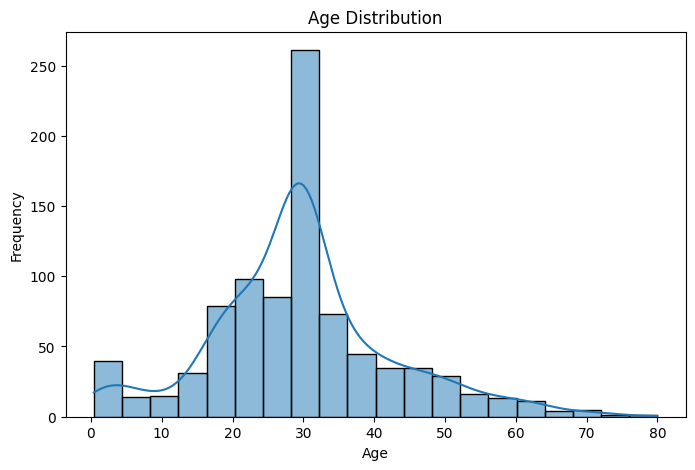

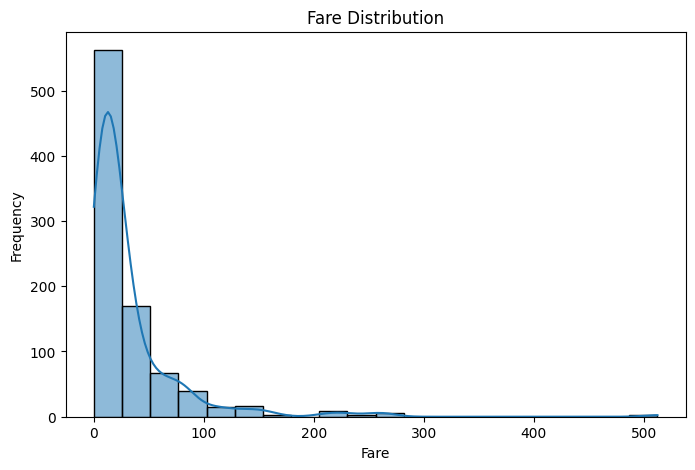

In [15]:
# histogram for numeric variables

plt.figure(figsize = (8,5))
sns.histplot(df['Age'],bins = 20 , kde = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")


plt.figure(figsize = (8,5))
sns.histplot(df['Fare'],bins = 20 , kde = True)
plt.title("Fare Distribution")
plt.ylabel("Frequency")

# most of the Passengers are b/w 20 & 40
# and the distribution of age is right skewed distribution
# kde(kernel distribution estimate) that shows smooth view of the distribution that contain multiple ranges of age

# Fare has highly right skewed distribution with long tail extending towards higher values
# range b/w 0 to 50 passengers have paid less amounts while few paid signicantly high amount.
# kde smooth view at lower range & gradully increas toward higher range

/tmp/ipython-input-16-3992190441.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass',palette= 'viridis')
/tmp/ipython-input-16-3992190441.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Embarked',palette= 'muted')
/tmp/ipython-input-16-3992190441.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='muted')


Text(0.5, 0, 'sex')

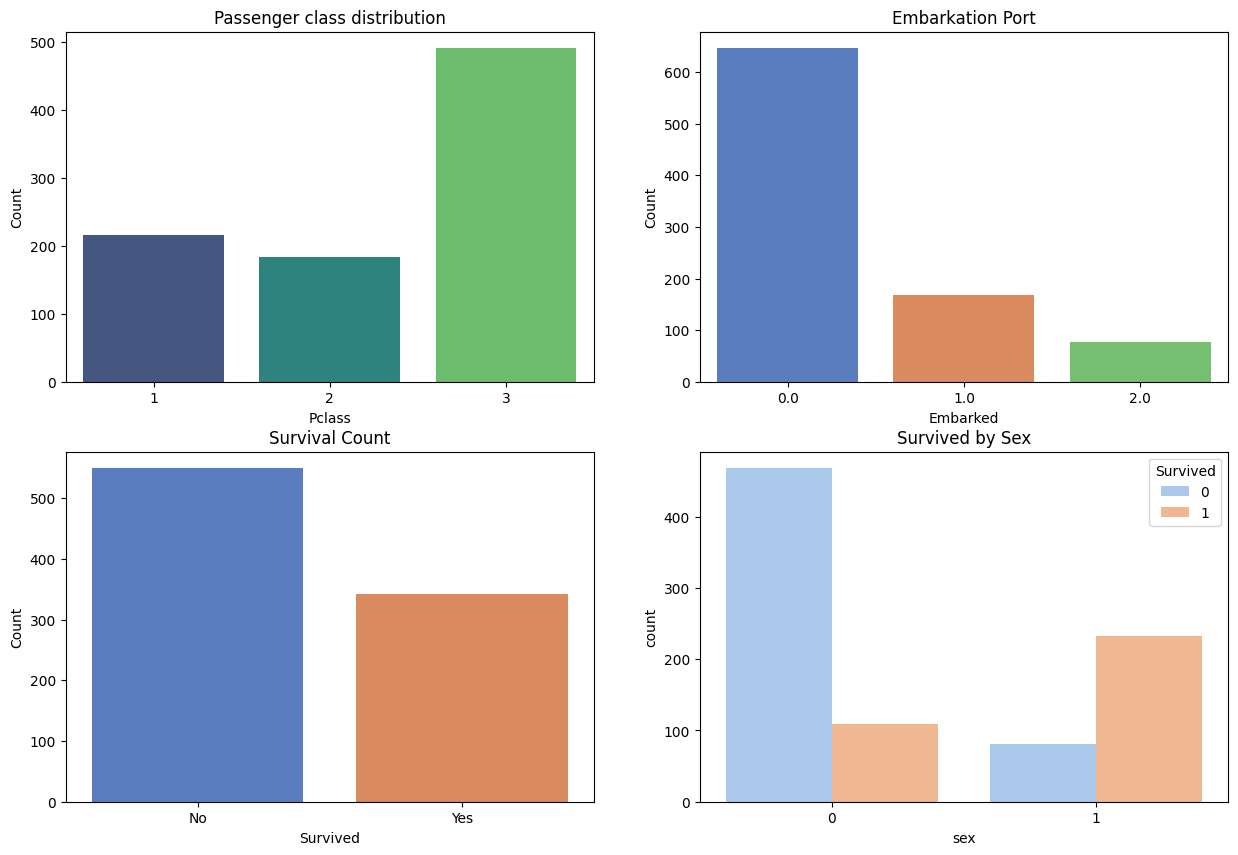

In [16]:
# Create a countplot for the 'pclass' column
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.countplot(data=df, x='Pclass',palette= 'viridis')
plt.title('Passenger class distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')

# count plot for Embarked column
plt.subplot(2,2,2)
sns.countplot(data=df, x='Embarked',palette= 'muted')
plt.title('Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Count')

# countplot for survived column
plt.subplot(2,2,3)
sns.countplot(data=df, x='Survived', palette='muted')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])

# count plot for survived by sex
plt.subplot(2,2,4)
sns.countplot(data=df, x= 'Sex',hue = 'Survived', palette= 'pastel')
plt.title('Survived by Sex')
plt.xlabel("sex")


Text(0, 0.5, 'Survived')

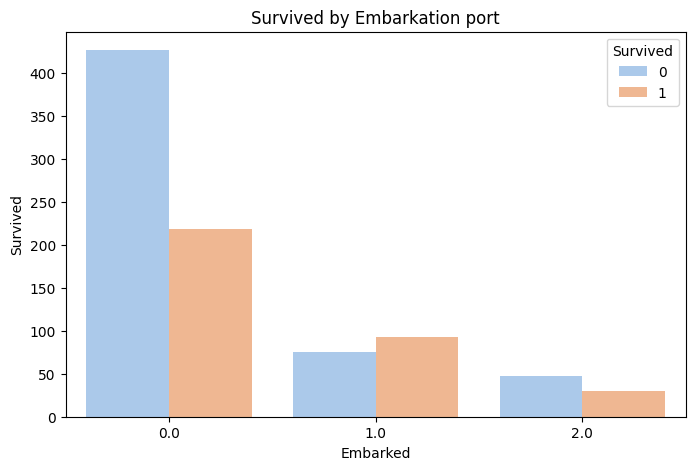

In [17]:
# count plot for survived by sex
plt.figure(figsize = (8,5))
sns.countplot(data=df, x= 'Embarked',hue = 'Survived', palette= 'pastel')
plt.title('Survived by Embarkation port')
plt.xlabel("Embarked")
plt.ylabel("Survived")

In [18]:
# most of the passengers are in 3rd class
# most of the passengers are embarked at southampton(s) and then cherbourg(c) & queenstoen(Q)
# THE PASSENGERS WHO SURVIVED CODED AS 1 & PASSENGERS WHO DID NOT SURVIVE CODED AS 0
# FEMALES SURVIVE RATE IS HIGH COMPARED to MALES

<Axes: >

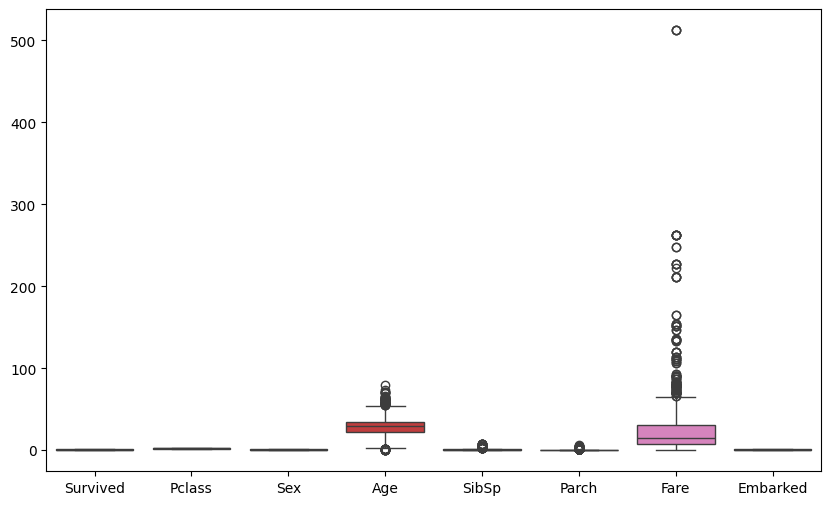

In [19]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df)

# Age : the median age contain 50% of the data.
# SibSp & parch :  These features have lower median values and some higher outliers.
# Fare : has lower median with several higher outliers.

Text(0.5, 1.0, 'Correlation Heatmap')

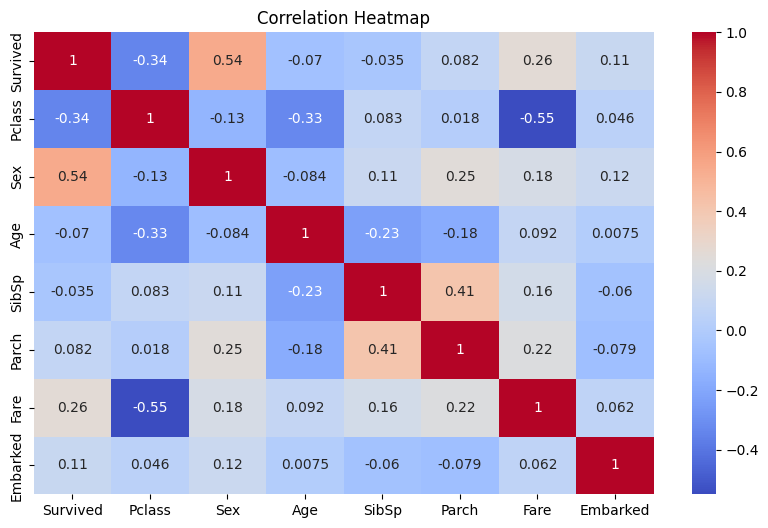

In [20]:
# Boxplot for numerical features

plt.figure(figsize = (10,6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot = True , cmap = 'coolwarm')
plt.title('Correlation Heatmap')

In [21]:
# Handle missing values
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


# Model Building

In [23]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [24]:
# train-test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size = 0.7, random_state= 42)

In [25]:
# train the model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# Evaluate the model
y_prediction = model.predict(x_test)
y_prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score

accuracy = accuracy_score(y_test, y_prediction)
conf_matrix = confusion_matrix(y_test, y_prediction)
class_report = classification_report(y_test, y_prediction)
roc_auc = roc_auc_score(y_test, y_prediction)

print(f"Accuracy:" ,{accuracy} )
print(f"Confusion_Matrix:")
print(conf_matrix)
print(f"Classification_Report:")
print(class_report)
print(f"ROC_AUC_SCORE:")
print(roc_auc)

# classification report include precision score, recall score, f1-score

# accuracy : calculates the correct prediction by comparing y_test & y_pred is 0.81
# confusion matrix : it shows how many predictions were correct & where the model made mistake
# classification report : provides the summary of the classification report.
# ROC_AUC : distinguish the performance of the model b/w +ve & -ve classes

Accuracy: {0.8059701492537313}
Confusion_Matrix:
[[136  21]
 [ 31  80]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.72      0.75       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

ROC_AUC_SCORE:
0.7934813794686406


In [28]:
# coefficient of logistic regression model --> provide relationship b/w each  features

feature_names = X.columns        # extract feature from the dataset
coefficients = model.coef_[0]    # extract coefficients from the trainrd logistic regression mode

coef_df = pd.DataFrame({'Features':feature_names, 'Coefficients':coefficients})
print("Coef_df:",coef_df)

# coeeficients for pclass,age,sibsp,parch is -ve
# and for sex,fare & embarked is +ve

Coef_df:    Features  Coefficients
0    Pclass     -0.920557
1       Sex      2.436828
2       Age     -0.032865
3     SibSp     -0.269208
4     Parch     -0.025502
5      Fare      0.003066
6  Embarked      0.352205


# Significant Features

1]Pclass: the passengers in 1st class had survived compared to those passengers in 3rd class.

2]Sex:this is highly significant feature.And the survival rate of female is higher than compared to males.

3]Age: this feature is moderately significant & has near normal distribution.

4]Fare : this is a significant feature determines that the passenger who paid high fares had suvival probability.

5]Embarked: the embarkation port Chebourg(C) had the highest survival rate.